The commodities-api returns market data of many stock exchanges among them is the Chicago Board of trade.

In [96]:
from config_gitignore import api_key #imports api key to access commodities API
import pandas as pd
import requests #library to querry APIs
import seaborn as sns
from matplotlib import pyplot as plt

# Getting historical market data

https://www.commodities-api.com/documentation

// "timeseries" endpoint - request exchange rates for a specific period of time

https://www.commodities-api.com/api/timeseries
? access_key = YOUR_ACCESS_KEY & start_date = YYYY-MM-DD & end_date = YYYY-MM-DD & base = USD & symbols = XAU,XAG

In [104]:
start_date = '2021-01-01'
end_date = '2021-12-31'


In [103]:
def get_historical_data(start_date, end_date, api_key):
    '''querries commidities_api and returns historical wheat price data in Euro as a dataframe
    saves wheat_df as csv'''
    base = 'EUR'
    symbols = 'WHEAT'
    url = 'https://www.commodities-api.com/api/timeseries'
    querry = url+'?access_key=' + api_key +  '&start_date='+start_date+'&end_date='+end_date+'&base='+base+'&symbols='+symbols
    response = requests.get(querry)
    print(response)
    # Returned dates: 
    dates = response.json()['data']['rates'].keys()
    # Returned values of wheat prices in metrci tons

    rates = list()
    for key, value in response.json()['data']['rates'].items():
        rates.append(list(value.values())[0])
    wheat_df = pd.DataFrame({'date': dates, 'price':rates}) 
    wheat_df['price'] = 1/wheat_df['price'] 
    wheat_df.to_csv('Data/wheat_df')
    return wheat_df
    

In [105]:
wheat_df2021 = get_historical_data(start_date, end_date, api_key)

<Response [200]>


<AxesSubplot:title={'center':'Wheatprice development Chicago board of trade'}, xlabel='date', ylabel='price'>

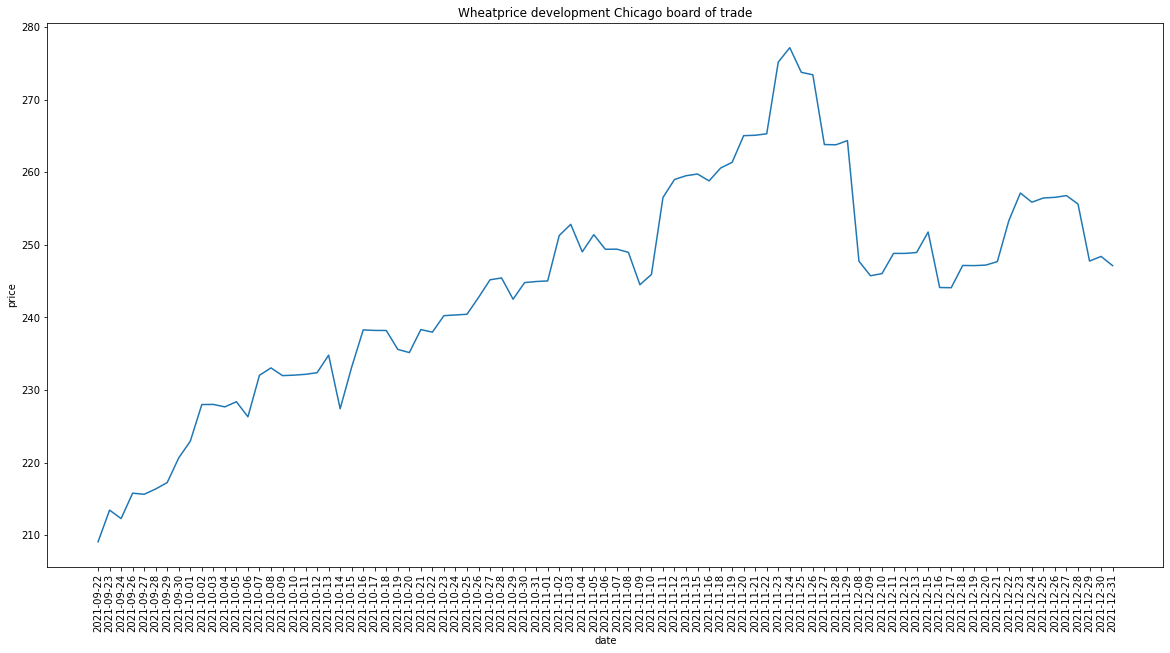

In [109]:
def plot_wheatprice(wheat_df):
    fig, ax = plt.subplots(figsize=(20,10))
    fig = sns.lineplot(ax=ax, x=wheat_df['date'], y=wheat_df['price'])
    fig.tick_params( axis='x', rotation=90)
    fig.set(title='Wheatprice development Chicago board of trade')
    return fig

plot_wheatprice(wheat_df2021)

# Get current data